# Artifact removal, Image restoration and Caption Generation using Deep Learning techniques



# BTech Major Project by:


###### Ayush Srivastava , Karaj Khosla, Shivam, Siddharth Chugh, Sukhneet Singh Malhotra 


* Runtime Type = Python 3
* Hardware Accelerator = GPU 


In [1]:
!git clone https://github.com/BetaWarriors/MajorProject.git MajorProject

Cloning into 'MajorProject'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [2]:
cd MajorProject

/content/MajorProject


In [1]:
from majorProject import device
from majorProject.device_id import DeviceId

device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

ModuleNotFoundError: No module named 'torch'

In [2]:
!pip install -r colab_requirements.txt

^C


  Using cached fastai-1.0.51-py3-none-any.whl (214 kB)
  Using cached tensorboardX-1.6-py2.py3-none-any.whl (129 kB)
  Using cached ffmpeg_python-0.1.17-py3-none-any.whl (20 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached torchvision-0.15.1-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached pandas-2.0.0-cp310-cp310-win_amd64.whl (11.2 MB)
  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached torch-2.0.0-cp310-cp310-win_amd64.whl (172.3 MB)
  Using cached Bottleneck-1.3.7-cp310-cp310-win_amd64.whl (109 kB)
  Using cached numexpr-2.8.4-cp310-cp310-win_amd64.whl (92 kB)
  Using cached spacy-3.5.2-cp310-cp310-win_amd64.whl (12.2 MB)
  Using cached protobuf-4.22.3-cp310-abi3-win_amd64.whl (420 kB)
  Using cached future-0.18.3.tar.gz (840 kB)
  Preparing

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.31 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.22.3 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import fastai
from majorProject.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [7]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-07-13 13:20:21--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  20.1MB/s    in 13s     

2021-07-13 13:20:35 (18.6 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [8]:
!wget https://github.com/BetaWarriors/MajorProject/blob/main/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-07-13 13:21:21--  https://github.com/BetaWarriors/MajorProject/blob/main/resource_images/watermark.png
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w     [ <=>                ] 112.29K  --.-KB/s    in 0.02s   

2021-07-13 13:21:22 (4.66 MB/s) - ‘./resource_images/watermark.png’ saved [114986]



In [9]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


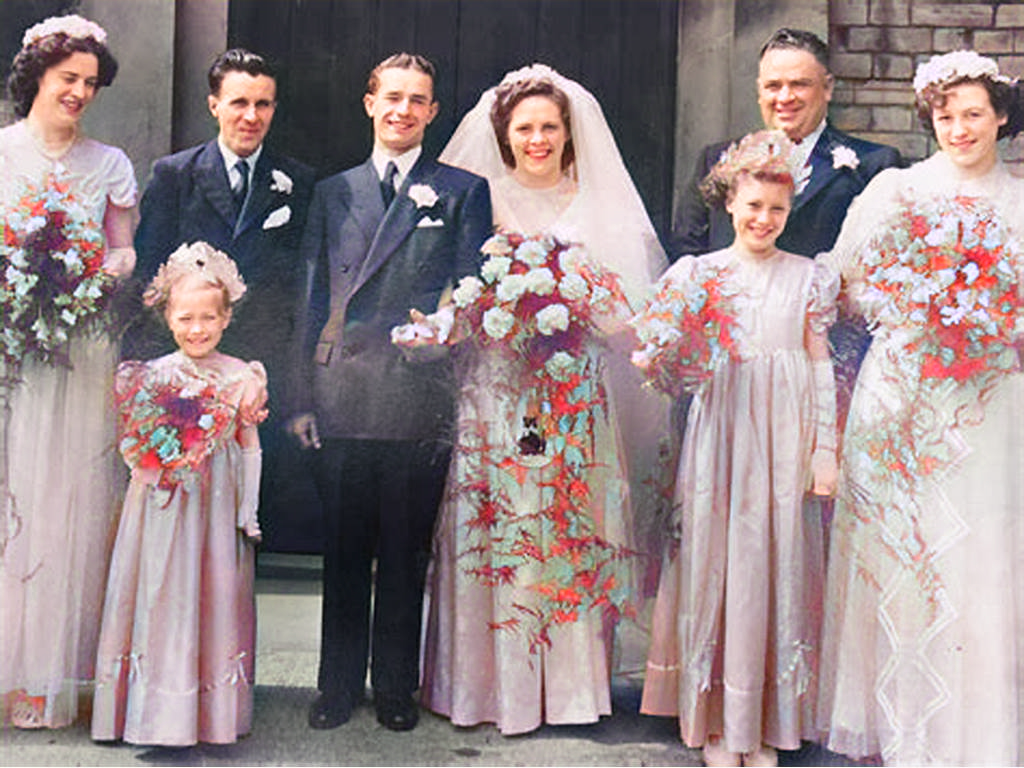

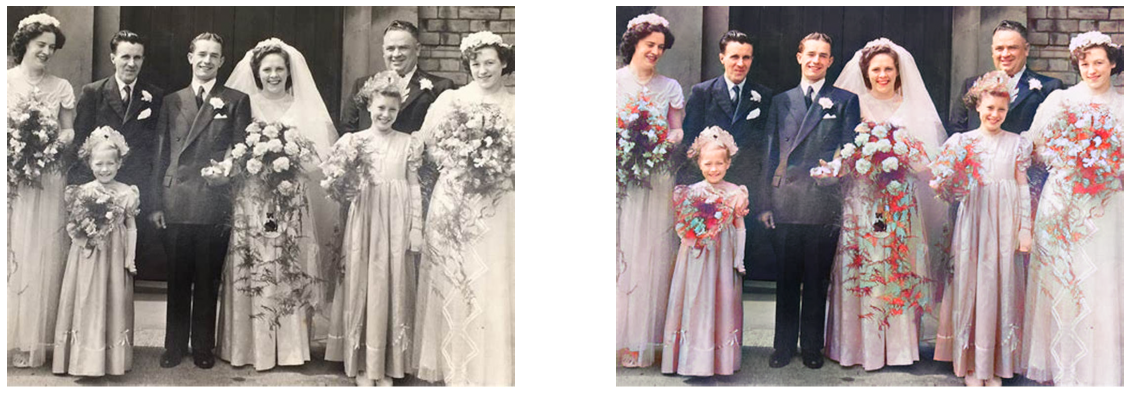

In [10]:
source_url = 'https://th.bing.com/th/id/OIP.mqbvmi51E1e86MzvMYeU4wHaFj?pid=ImgDet&w=1024&h=768&rs=1' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

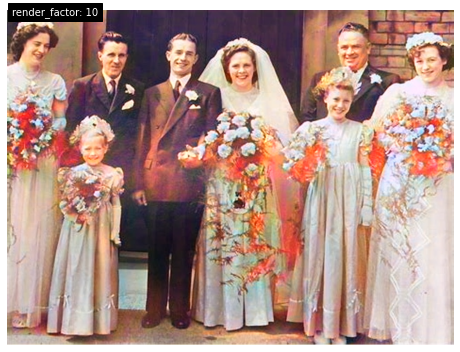

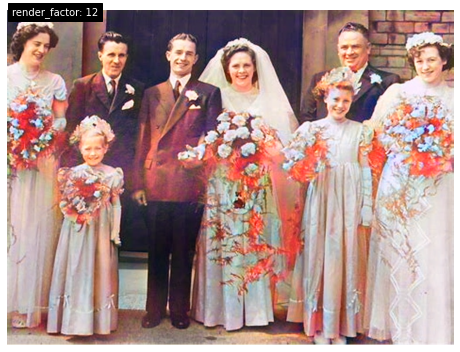

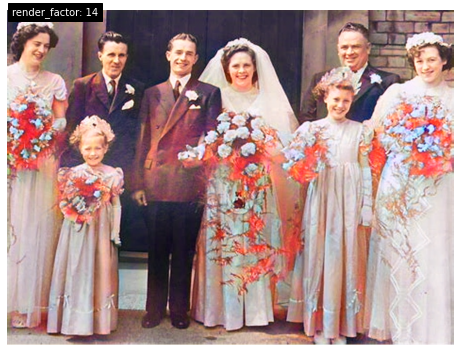

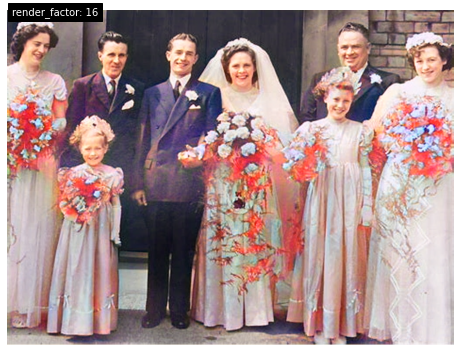

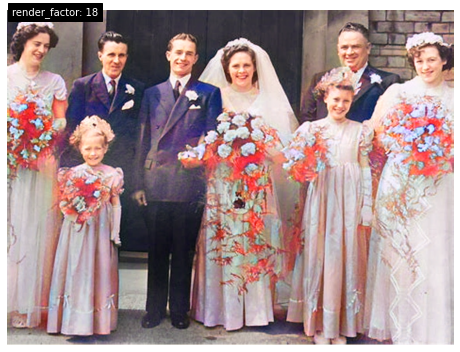

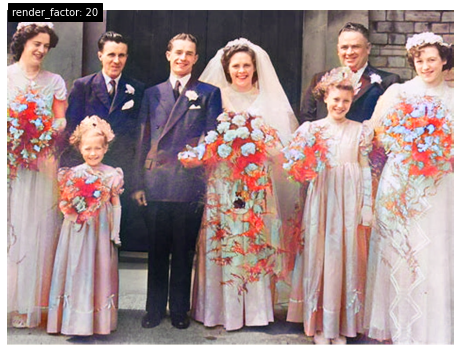

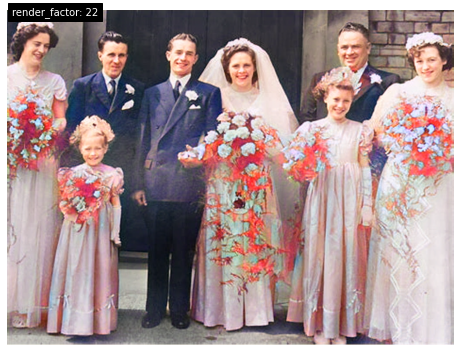

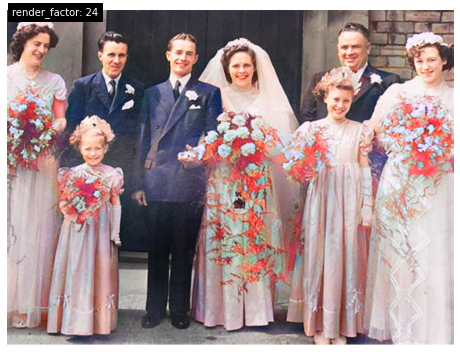

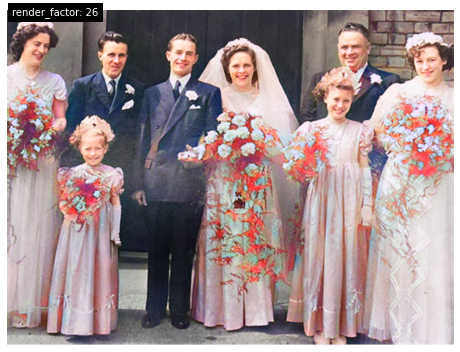

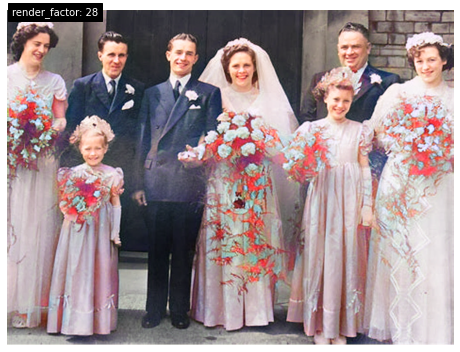

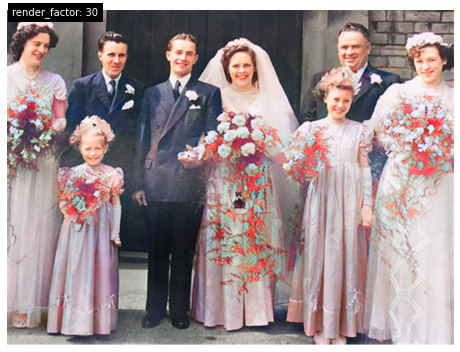

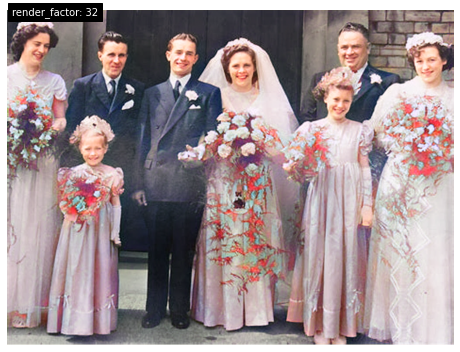

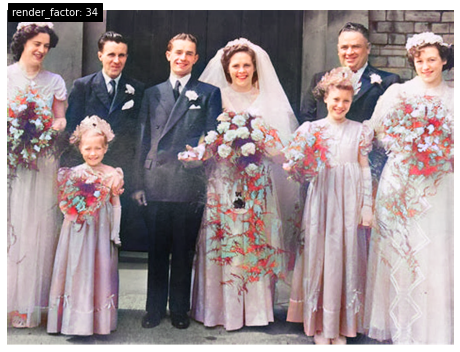

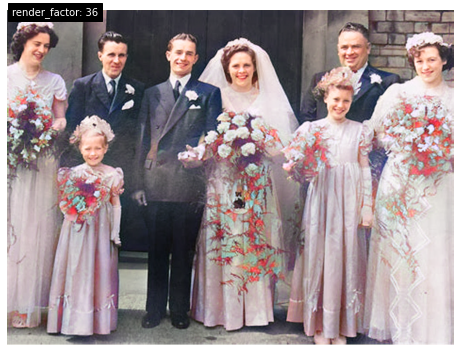

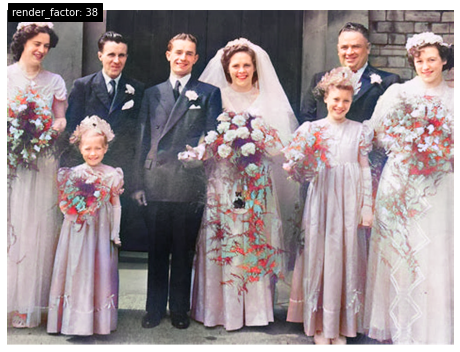

In [11]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))